In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Attributes of T2D-UCI Dataset 

* (https://www.hindawi.com/journals/bmri/2014/781670/tab1/)

| Feature name | Type | Description and values | % missing |
|--------------|------|------------------------|-----------|
| Encounter ID | Numeric | Unique identifier of an encounter | 0% |
| Patient number | Numeric | Unique identifier of a patient | 0% |
| Race | Nominal | Values: Caucasian, Asian, African American, Hispanic, and other | 2% |
| Gender | Nominal | Values: male, female, and unknown/invalid | 0% |
| Age | Nominal | Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100) | 0% |
| Weight | Numeric | Weight in pounds. | 97% |
| Admission type | Nominal | Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available | 0% |
| Discharge disposition | Nominal | Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available | 0% |
| Admission source | Nominal | Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital | 0% |
| Time in hospital | Numeric | Integer number of days between admission and discharge | 0% |
| Payer code | Nominal | Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay | 52% |
| Medical specialty | Nominal | Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon | 53% |
| Number of lab procedures | Numeric | Number of lab tests performed during the encounter | 0% |
| Number of procedures | Numeric | Number of procedures (other than lab tests) performed during the encounter | 0% |
| Number of medications | Numeric | Number of distinct generic names administered during the encounter | 0% |
| Number of outpatient visits | Numeric | Number of outpatient visits of the patient in the year preceding the encounter | 0% |
| Number of emergency visits | Numeric | Number of emergency visits of the patient in the year preceding the encounter | 0% |
| Number of inpatient visits | Numeric | Number of inpatient visits of the patient in the year preceding the encounter | 0% |
| Diagnosis 1 | Nominal | The primary diagnosis (coded as first three digits of ICD9); 848 distinct values | 0% |
| Diagnosis 2 | Nominal | Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values | 0% |
| Diagnosis 3 | Nominal | Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values | 1% |
| Number of diagnoses | Numeric | Number of diagnoses entered to the system | 0% |
| Glucose serum test result | Nominal | Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured | 0% |
| A1c test result | Nominal | Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured. | 0% |
| Change of medications | Nominal | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change” | 0% |
| Diabetes medications | Nominal | Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” | 0% |
| 24 features for medications | Nominal | For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed | 0% |
| Readmitted | Nominal | Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission. | 0% |


In [17]:
dataset_df = pd.read_csv("Data/diabetic_data.csv")
df = dataset_df
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (101766, 50)


In [3]:
# Display the first 5 examples
dataset_df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [24]:
df_id = pd.read_csv("Data/IDs_mapping.csv")

* count missing values

In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
na_counts = df.replace("?", pd.NA).isna().sum()

# Sort the variables by NA counts in descending order
na_counts_sorted = na_counts.sort_values(ascending=False)

# Display the sorted NA counts
print(na_counts_sorted)


* Missing value counts

| Variable            | NA Count |
|---------------------|----------|
| weight              | 98569    |
| medical_specialty   | 49949    |
| payer_code          | 40256    |
| race                | 2273     |
| diag_3              | 1423     |
| diag_2              | 358      |
| diag_1              | 21       |

* number of patient

In [41]:
num_unique_patients = dataset_df['patient_nbr'].nunique()
print("Number of unique patients:", num_unique_patients)


Number of unique patients: 71518


* Count frequencies of encounter counts per patient

/Users/justin/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


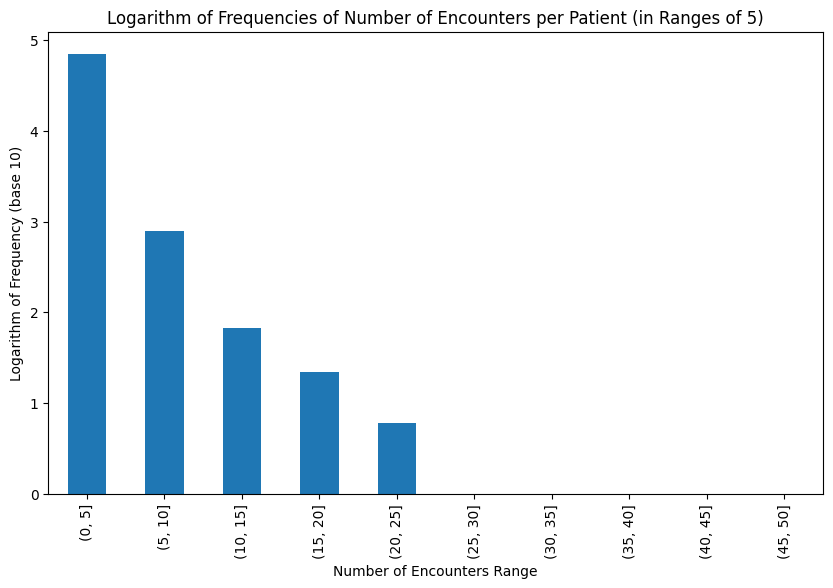

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Counting the number of encounters per patient
encounters_per_patient = dataset_df['patient_nbr'].value_counts().sort_values(ascending=False)

# Splitting the number of encounters into ranges
encounter_ranges = pd.cut(encounters_per_patient, bins=range(0, max(encounters_per_patient)+11, 5))

# Counting the frequencies of each range
range_frequencies = encounter_ranges.value_counts().sort_index()

# Applying logarithm transformation to frequencies
log_frequencies = np.log10(range_frequencies)

# Plotting the logarithm of frequencies
plt.figure(figsize=(10, 6))
log_frequencies.plot(kind='bar')
plt.xlabel('Number of Encounters Range')
plt.ylabel('Logarithm of Frequency (base 10)')
plt.title('Logarithm of Frequencies of Number of Encounters per Patient (in Ranges of 5)')
plt.show()


* id description

Table 1: `admission_type_id`

| ID | Description     |
|----|-----------------|
| 1  | Emergency       |
| 2  | Urgent          |
| 3  | Elective        |
| 4  | Newborn         |
| 5  | Not Available   |
| 6  | NULL            |
| 7  | Trauma Center   |
| 8  | Not Mapped      |

Table 2: `discharge_disposition_id`

| ID  | Description                                                                               |
|-----|-------------------------------------------------------------------------------------------|
| 1   | Discharged to home                                                                       |
| 2   | Discharged/transferred to another short term hospital                                      |
| 3   | Discharged/transferred to SNF                                                             |
| 4   | Discharged/transferred to ICF                                                             |
| 5   | Discharged/transferred to another type of inpatient care institution                     |
| 6   | Discharged/transferred to home with home health service                                    |
| 7   | Left AMA                                                                                  |
| 8   | Discharged/transferred to home under care of Home IV provider                             |
| 9   | Admitted as an inpatient to this hospital                                                 |
| 10  | Neonate discharged to another hospital for neonatal aftercare                             |
| 11  | Expired                                                                                   |
| 12  | Still patient or expected to return for outpatient services                               |
| 13  | Hospice / home                                                                            |
| 14  | Hospice / medical facility                                                                |
| 15  | Discharged/transferred within this institution to Medicare approved swing bed             |
| 16  | Discharged/transferred/referred another institution for outpatient services               |
| 17  | Discharged/transferred/referred to this institution for outpatient services               |
| 18  | NULL                                                                                      |
| 19  | Expired at home. Medicaid only, hospice.                                                  |
| 20  | Expired in a medical facility. Medicaid only, hospice.                                    |
| 21  | Expired, place unknown. Medicaid only, hospice.                                           |
| 22  | Discharged/transferred to another rehab fac including rehab units of a hospital            |
| 23  | Discharged/transferred to a long term care hospital                                        |
| 24  | Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare |
| 25  | Not Mapped                                                                                |
| 26  | Unknown/Invalid                                                                           |
| 30  | Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere   |
| 27  | Discharged/transferred to a federal health care facility                                  |
| 28  | Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital |
| 29  | Discharged/transferred to a Critical Access Hospital (CAH)                                |

Table 3: `admission_source_id`

| ID  | Description                                                                                              |
|-----|----------------------------------------------------------------------------------------------------------|
| 1   | Physician Referral                                                                                       |
| 2   | Clinic Referral                                                                                          |
| 3   | HMO Referral                                                                                             |
| 4   | Transfer from a hospital                                                                                 |
| 5   | Transfer from a Skilled Nursing Facility (SNF)                                                           |
| 6   | Transfer from another health care facility                                                               |
| 7   | Emergency Room                                                                                           |
| 8   | Court/Law Enforcement                                                                                    |
| 9   | Not Available                                                                                            |
| 10  | Transfer from critical access hospital                                                                    |
| 11  | Normal Delivery                                                                                          |
| 12  | Premature Delivery                                                                                        |


Admission Type Frequencies:
  Admission Type  Frequency
0      Emergency      53990
1       Elective      18869
2         Urgent      18480
3           NULL       5291
4  Not Available       4785
5     Not Mapped        320
6  Trauma Center         21
7        Newborn         10

Discharge Disposition Frequencies:
                                Discharge Disposition  Frequency
0                                  Discharged to home      60234
1                       Discharged/transferred to SNF      13954
2   Discharged/transferred to home with home healt...      12902
3                                                NULL       3691
4   Discharged/transferred to another short term h...       2128
5   Discharged/transferred to another rehab fac in...       1993
6                                             Expired       1642
7   Discharged/transferred to another type of inpa...       1184
8                                          Not Mapped        989
9                       Discharged

/var/folders/db/dkqv3mq12fg2m2pqjzjx0_700000gn/T/ipykernel_7006/1400171166.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(admission_type_freq['Admission Type'], rotation=45, ha='right')
/var/folders/db/dkqv3mq12fg2m2pqjzjx0_700000gn/T/ipykernel_7006/1400171166.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(discharge_disposition_freq['Discharge Disposition'], rotation=45, ha='right')
/var/folders/db/dkqv3mq12fg2m2pqjzjx0_700000gn/T/ipykernel_7006/1400171166.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(admission_source_freq['Admission Source'], rotation=45, ha='right')


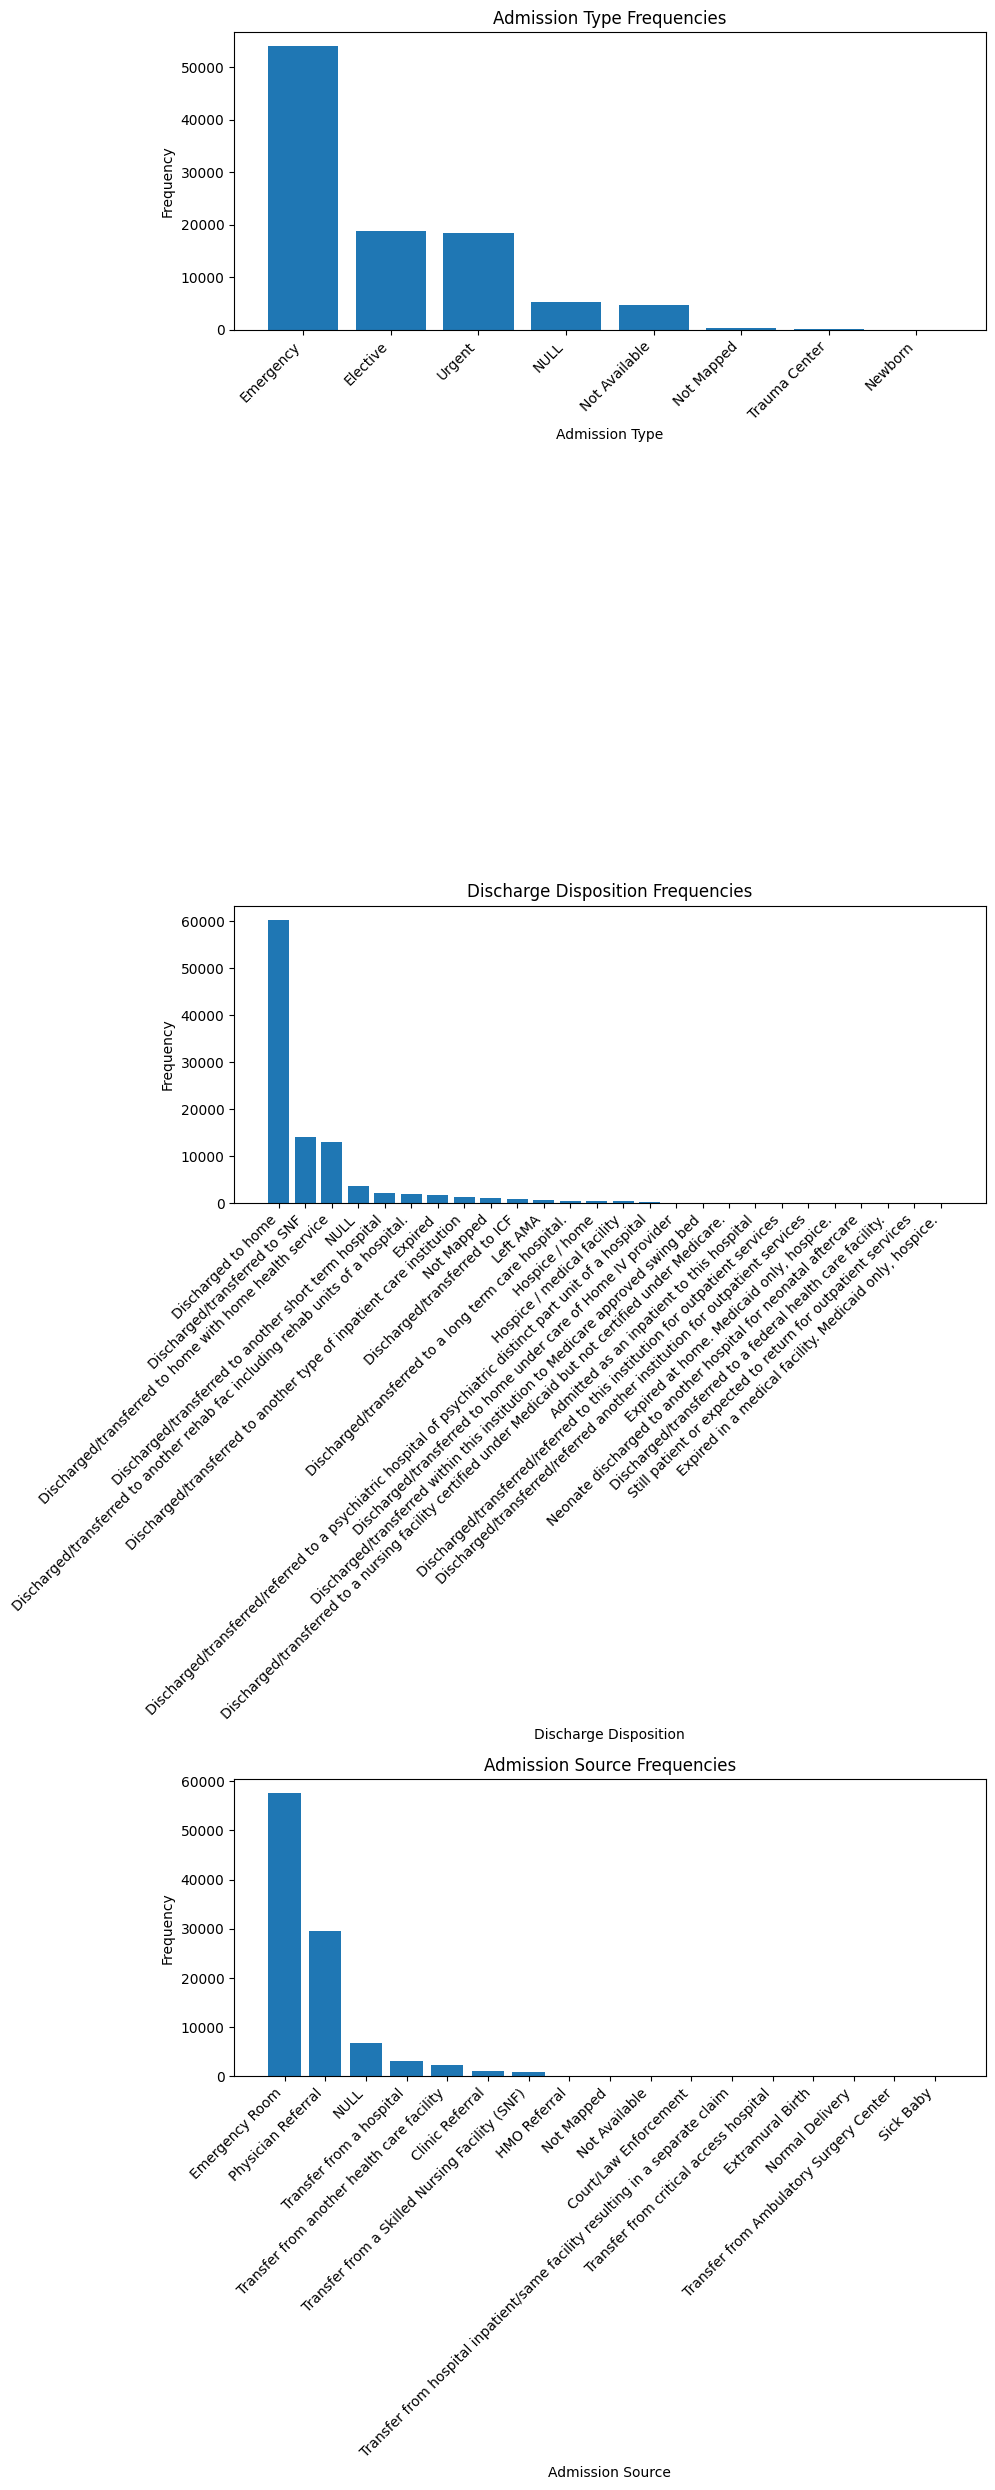

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the tables with ID-description mappings
admission_type_table = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

discharge_disposition_table = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital.',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    27: 'Discharged/transferred to a federal health care facility.',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH).'
}

admission_source_table = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpatient/same facility resulting in a separate claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

# Count frequencies of the IDs
admission_type_freq = dataset_df['admission_type_id'].map(admission_type_table).value_counts().reset_index()
admission_type_freq.columns = ['Admission Type', 'Frequency']

discharge_disposition_freq = dataset_df['discharge_disposition_id'].map(discharge_disposition_table).value_counts().reset_index()
discharge_disposition_freq.columns = ['Discharge Disposition', 'Frequency']

admission_source_freq = dataset_df['admission_source_id'].map(admission_source_table).value_counts().reset_index()
admission_source_freq.columns = ['Admission Source', 'Frequency']

# Print the frequency tables
print("Admission Type Frequencies:")
print(admission_type_freq)
print()

print("Discharge Disposition Frequencies:")
print(discharge_disposition_freq)
print()

print("Admission Source Frequencies:")
print(admission_source_freq)
print()

# Plot the frequencies
fig, axes = plt.subplots(3, 1, figsize=(10, 25))

# Plot Admission Type frequencies
axes[0].bar(admission_type_freq['Admission Type'], admission_type_freq['Frequency'])
axes[0].set_xticklabels(admission_type_freq['Admission Type'], rotation=45, ha='right')
axes[0].set_xlabel('Admission Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Admission Type Frequencies')

# Plot Discharge Disposition frequencies
axes[1].bar(discharge_disposition_freq['Discharge Disposition'], discharge_disposition_freq['Frequency'])
axes[1].set_xticklabels(discharge_disposition_freq['Discharge Disposition'], rotation=45, ha='right')
axes[1].set_xlabel('Discharge Disposition')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Discharge Disposition Frequencies')

# Plot Admission Source frequencies
axes[2].bar(admission_source_freq['Admission Source'], admission_source_freq['Frequency'])
axes[2].set_xticklabels(admission_source_freq['Admission Source'], rotation=45, ha='right')
axes[2].set_xlabel('Admission Source')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Admission Source Frequencies')

plt.tight_layout()
plt.show()


* number of data types

In [15]:
df = dataset_df
# Get unique data types
unique_types = df.dtypes.nunique()

# Print the number of unique data types
print("Number of unique data types:", unique_types)
df.dtypes.unique()

Number of unique data types: 2


array([dtype('int64'), dtype('O')], dtype=object)

* list of variables of each data type

In [28]:
# Select columns with 'int64' data type
int_columns = df.select_dtypes(include='int64')

# Select columns with 'object' data type
object_columns = df.select_dtypes(include='object')

# Display the columns with 'int64' data type
print("Columns with 'int64' data type:")
print(int_columns.columns.tolist())

# Display the columns with 'object' data type
print("Columns with 'object' data type:")
print(object_columns.columns.tolist())

Columns with 'int64' data type:
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Columns with 'object' data type:
['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [24]:
print("Columns with 'int64' data type:")
print(int_columns.info())

Columns with 'int64' data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   admission_type_id         101766 non-null  int64
 3   discharge_disposition_id  101766 non-null  int64
 4   admission_source_id       101766 non-null  int64
 5   time_in_hospital          101766 non-null  int64
 6   num_lab_procedures        101766 non-null  int64
 7   num_procedures            101766 non-null  int64
 8   num_medications           101766 non-null  int64
 9   number_outpatient         101766 non-null  int64
 10  number_emergency          101766 non-null  int64
 11  number_inpatient          101766 non-null  int64
 12  number_diagnoses          101766 non-null  int64
dtypes: int64(13)
memory usage: 10.1 MB
None


In [27]:
print(object_columns.info(verbose=True, max_cols=18))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   race                      object
 1   gender                    object
 2   age                       object
 3   weight                    object
 4   payer_code                object
 5   medical_specialty         object
 6   diag_1                    object
 7   diag_2                    object
 8   diag_3                    object
 9   max_glu_serum             object
 10  A1Cresult                 object
 11  metformin                 object
 12  repaglinide               object
 13  nateglinide               object
 14  chlorpropamide            object
 15  glimepiride               object
 16  acetohexamide             object
 17  glipizide                 object
 18  glyburide                 object
 19  tolbutamide               object
 20  pioglitazone              object
 21  rosiglitaz

In [26]:
#print(object_columns.info(verbose=True, max_cols=18))
print(object_columns.iloc[:, -18:].info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   tolbutamide               101766 non-null  object
 1   pioglitazone              101766 non-null  object
 2   rosiglitazone             101766 non-null  object
 3   acarbose                  101766 non-null  object
 4   miglitol                  101766 non-null  object
 5   troglitazone              101766 non-null  object
 6   tolazamide                101766 non-null  object
 7   examide                   101766 non-null  object
 8   citoglipton               101766 non-null  object
 9   insulin                   101766 non-null  object
 10  glyburide-metformin       101766 non-null  object
 11  glipizide-metformin       101766 non-null  object
 12  glimepiride-pioglitazone  101766 non-null  object
 13  metformin-rosiglitazone   101766 non-null  object
 14  metf

* Statistics description of numerical variables

In [7]:
dataset_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


* <span style="color:red">missing data issue - weight 97% of rows missing</span>

* First frequency of each categorical variable

In [29]:
dataset_df.select_dtypes(include='object').describe()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


* Top 5 frequencies of each categorical variable

In [12]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with categorical columns

# Select only the categorical columns
categorical_columns = dataset_df.select_dtypes(include='object').columns
df = dataset_df

# Create a dictionary to store the first 5 frequencies of each categorical variable
freq_table = {}

# Loop through each categorical column and store the first 5 frequencies in the dictionary
for column in categorical_columns:
    freq_table[column] = df[column].dropna().value_counts().head(5)
    print(freq_table[column])
    print("---------------")
# Create a DataFrame from the frequency table dictionary
freq_table_df = pd.DataFrame(freq_table)

# Transpose the DataFrame for a better view
freq_table_df = freq_table_df.T

# Print the frequency table DataFrame
#print(freq_table_df)


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)    26068
[60-70)    22483
[50-60)    17256
[80-90)    17197
[40-50)     9685
Name: age, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
Name: weight, dtype: int64
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
Name: payer_code, dtype: int64
?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
Name: medical_specialty, dtype: int64
428    6862
414    6581
786    4016
410    3614
486    3508
Name: diag_1, dtype: int64
276    6752
428    6662
250    6071
427    5036
401    3736
Name: diag_2, dtype: int64
250    11555
401     8289
276     5175
428     4577
42

* Top 5 frequencies of each categorical variable


| Variable                | Category            | Count |
|-------------------------|---------------------|-------|
| race                    | Caucasian           | 76099 |
|                         | AfricanAmerican     | 19210 |
|                         | ?                   | 2273  |
|                         | Hispanic            | 2037  |
|                         | Other               | 1506  |
| gender                  | Female              | 54708 |
|                         | Male                | 47055 |
|                         | Unknown/Invalid     | 3     |
| age                     | [70-80)             | 26068 |
|                         | [60-70)             | 22483 |
|                         | [50-60)             | 17256 |
|                         | [80-90)             | 17197 |
|                         | [40-50)             | 9685  |
| weight                  | ?                   | 98569 |
|                         | [75-100)            | 1336  |
|                         | [50-75)             | 897   |
|                         | [100-125)           | 625   |
|                         | [125-150)           | 145   |
| payer_code              | ?                   | 40256 |
|                         | MC                  | 32439 |
|                         | HM                  | 6274  |
|                         | SP                  | 5007  |
|                         | BC                  | 4655  |
| medical_specialty       | ?                   | 49949 |
|                         | InternalMedicine    | 14635 |
|                         | Emergency/Trauma    | 7565  |
|                         | Family/GeneralPractice | 7440  |
|                         | Cardiology          | 5352  |
| diag_1                  | 428                 | 6862  |
|                         | 414                 | 6581  |
|                         | 786                 | 4016  |
|                         | 410                 | 3614  |
|                         | 486                 | 3508  |
| diag_2                  | 276                 | 6752  |
|                         | 428                 | 6662  |
|                         | 250                 | 6071  |
|                         | 427                 | 5036  |
|                         | 401                 | 3736  |
| diag_3                  | 250                 | 11555 |
|                         | 401                 | 8289  |
|                         | 276                 | 5175  |
|                         | 428                 | 4577  |
|                         | 427                 | 3955  |
| max_glu_serum           | None                | 96420 |
|                         | Norm                | 2597  |
|                         | >200                | 1485  |
|                         | >300                | 1264  |
| A1Cresult               | None                | 84748 |
|                         | >8                  | 8216  |
|                         | Norm                | 4990  |
|                         | >7                  | 3812  |
| metformin               | No                  | 81778 |
|                         | Steady              | 18346 |
|                         | Up                  | 1067  |
|                         | Down                | 575   |
| repaglinide             | No                  | 100227|
|                         | Steady              | 1384  |
|                         | Up                  | 110   |
|                         | Down                | 45    |
| nateglinide             | No                  | 101063|
|                         | Steady              | 668   |
|                         | Up                  | 24    |
|                         | Down                | 11    |
| chlorpropamide          | No                  | 101680|
|                         | Steady              | 79    |
|                         | Up                  | 6     |
|                         | Down                | 1     |
| glimepiride             | No                  | 96575 |
|                         | Steady              | 4670  |
|                         | Up                  | 327   |
|                         | Down                | 194   |
| acetohexamide           | No                  | 101765|
|                         | Steady              | 1     |
| glipizide               | No                  | 89080 |
|                         | Steady              | 11356 |
|                         | Up                  | 770   |
|                         | Down                | 560   |
| glyburide               | No                  | 91116 |
|                         | Steady              | 9274  |
|                         | Up                  | 812   |
|                         | Down                | 564   |
| tolbutamide             | No                  | 101743|
|                         | Steady              | 23    |
| pioglitazone            | No                  | 94438 |
|                         | Steady              | 6976  |
|                         | Up                  | 234   |
|                         | Down                | 118   |
| rosiglitazone           | No                  | 95401 |
|                         | Steady              | 6100  |
|                         | Up                  | 178   |
|                         | Down                | 87    |
| acarbose                | No                  | 101458|
|                         | Steady              | 295   |
|                         | Up                  | 10    |
|                         | Down                | 3     |
| miglitol                | No                  | 101728|
|                         | Steady              | 31    |
|                         | Down                | 5     |
|                         | Up                  | 2     |
| troglitazone            | No                  | 101763|
|                         | Steady              | 3     |
| tolazamide              | No                  | 101727|
|                         | Steady              | 38    |
|                         | Up                  | 1     |
| examide                 | No                  | 101766|
| citoglipton             | No                  | 101766|
| insulin                 | No                  | 47383 |
|                         | Steady              | 30849 |
|                         | Down                | 12218 |
|                         | Up                  | 11316 |
| glyburide-metformin     | No                  | 101060|
|                         | Steady              | 692   |
|                         | Up                  | 8     |
|                         | Down                | 6     |
| glipizide-metformin     | No                  | 101753|
|                         | Steady              | 13    |
| glimepiride-pioglitazone | No                  | 101765|
|                         | Steady              | 1     |
| metformin-rosiglitazone | No                  | 101764|
|                         | Steady              | 2     |
| metformin-pioglitazone  | No                  | 101765|
|                         | Steady              | 1     |
| change                  | No                  | 54755 |
|                         | Ch                  | 47011 |
| diabetesMed             | Yes                 | 78363 |
|                         | No                  | 23403 |
| readmitted              | NO                  | 54864 |
|                         | >30                 | 35545 |
|                         | <30                 | 11357 |


* Histograms of variables with more than 5 unique values 

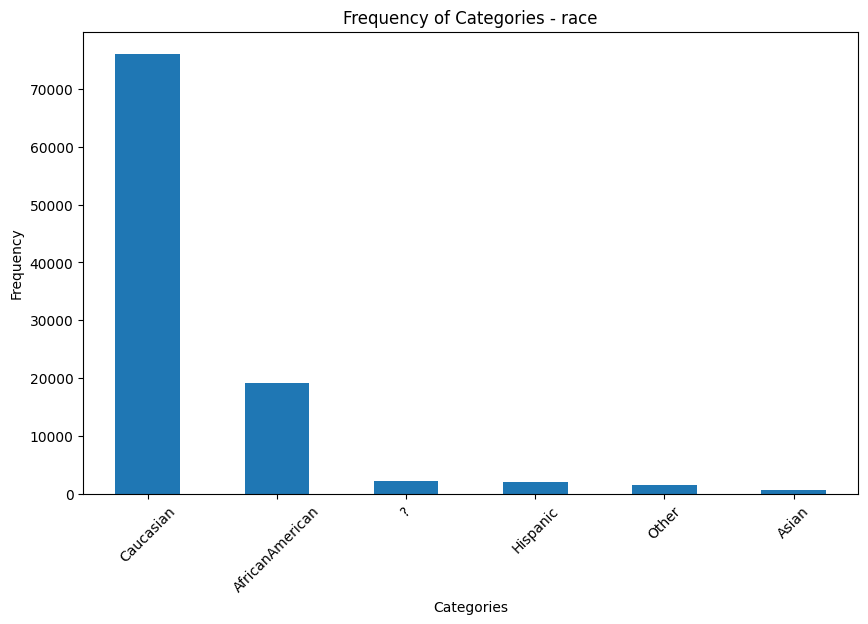

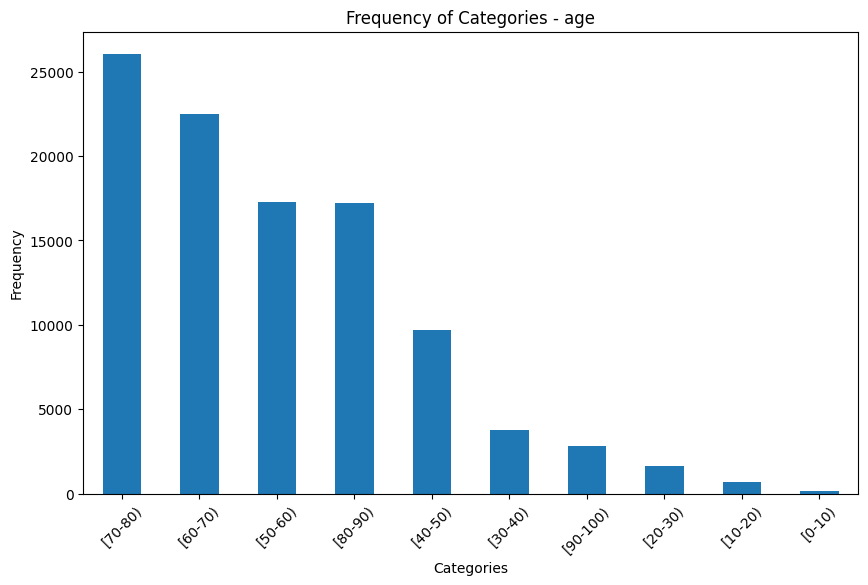

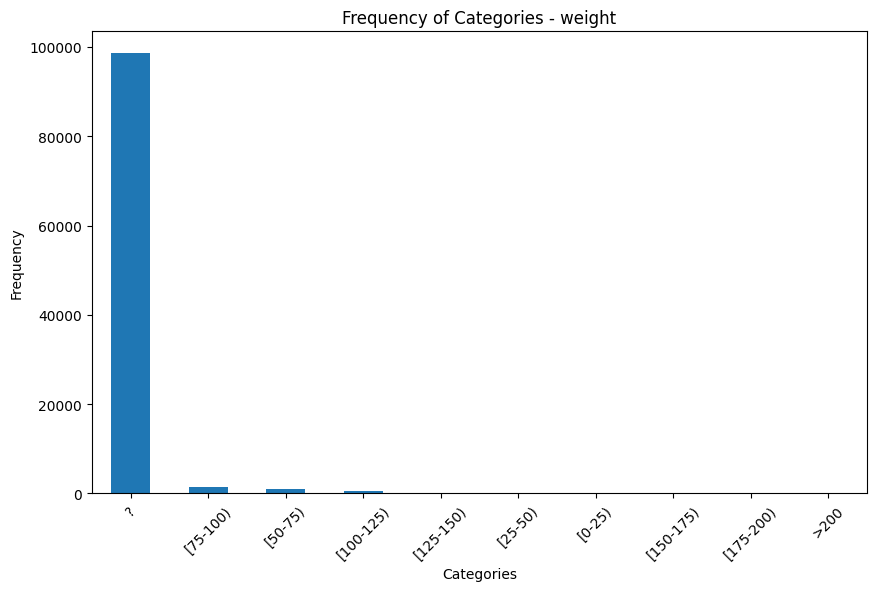

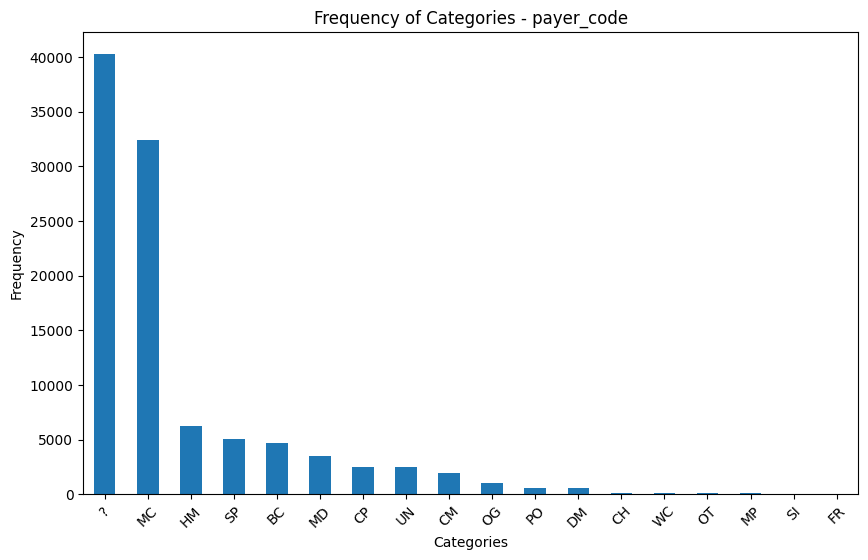

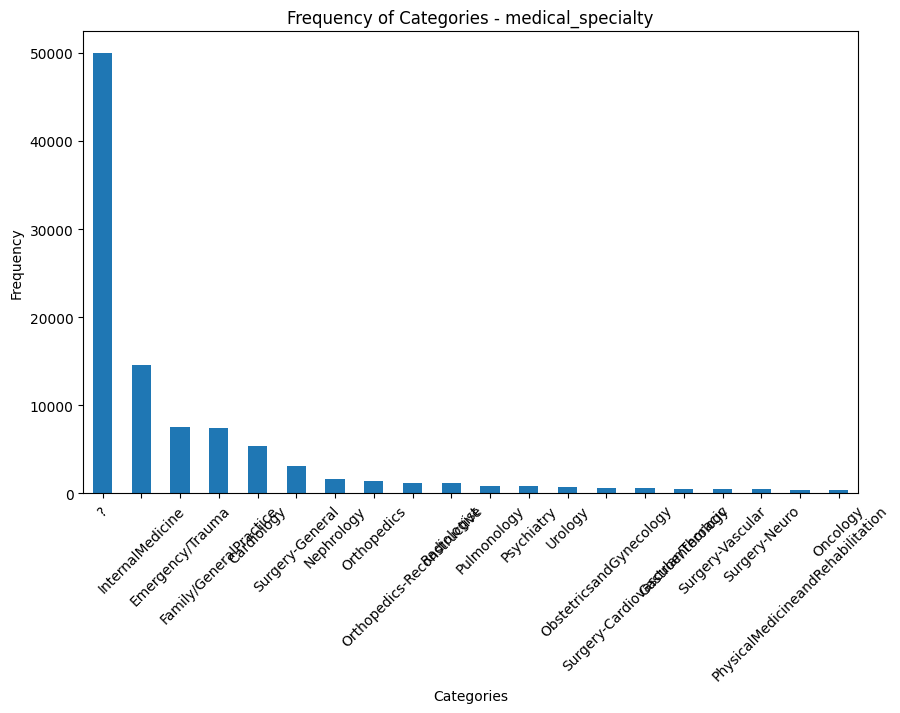

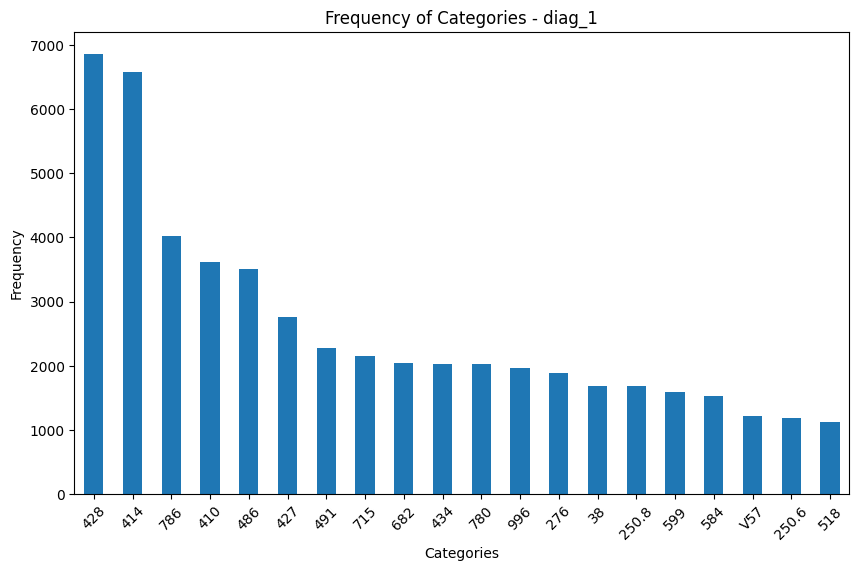

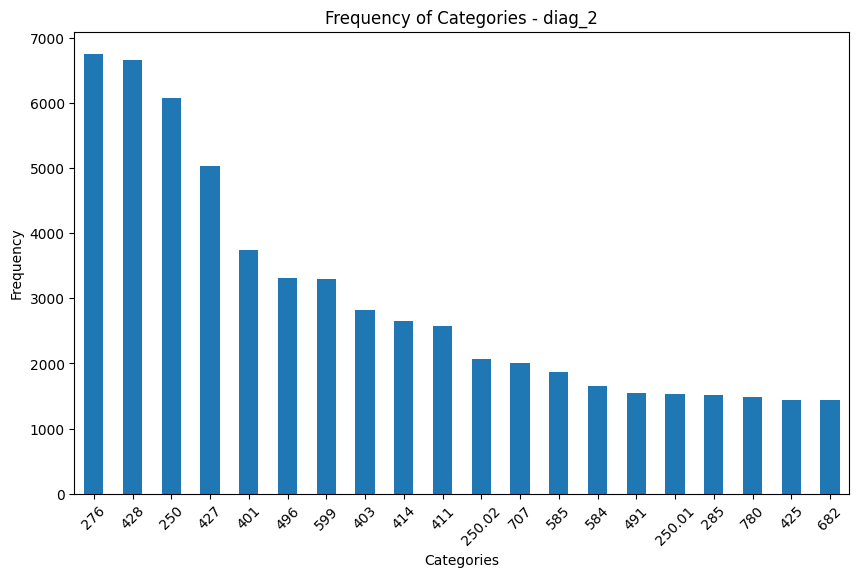

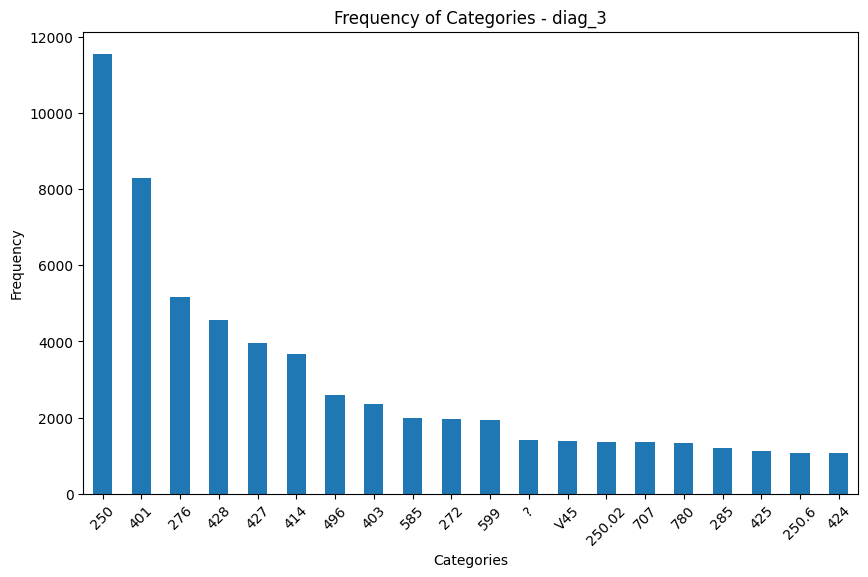

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' containing your data

# Selecting only the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Looping through each categorical column
for column in categorical_columns:
    # Counting the number of unique values
    unique_values = df[column].nunique()
    
    # Only visualize if the number of unique values is greater than 5
    if unique_values > 5:
        # Counting the frequency of each category
        category_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Selecting the top 20 frequencies
        top_20 = category_counts.head(20)
        
        # Plotting the bar chart
        plt.figure(figsize=(10, 6))
        top_20.plot(kind='bar')
        plt.title(f'Frequency of Categories - {column}')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
